In [1]:
import numpy as np
import pandas as pd
from matplotlib import dates

In [2]:
data = pd.read_csv("TimeSeriesData.csv", index_col = 'Date')
data.dropna(inplace = True)
data.index
data.index = pd.to_datetime(data.index)
data.index.freq = 'D'

In [3]:
data.head()

,Number of patients
Date,
2015-04-01,49
2015-04-02,58
2015-04-03,36
2015-04-04,44
2015-04-05,64


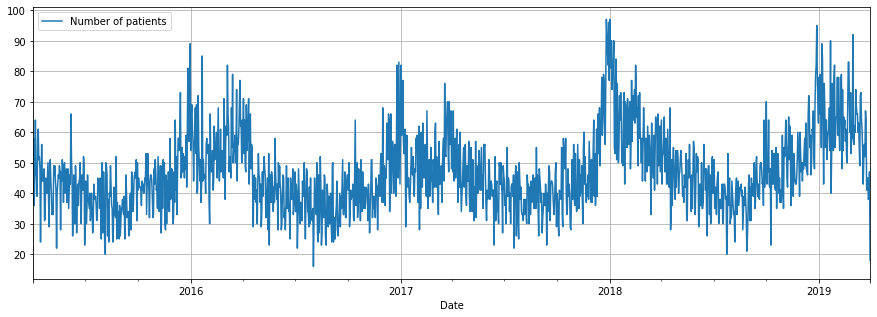

In [4]:
ax = data.plot(figsize = (15,5))
ax.yaxis.grid(True)
ax.xaxis.grid(True)

# ETS Decomposition

In [5]:
data = data.dropna()

In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [7]:
result_1 = seasonal_decompose(data['Number of patients'], model = 'additive', extrapolate_trend='freq')

In [8]:
result_2 = seasonal_decompose(data['Number of patients'], model = 'multiplicative', extrapolate_trend='freq')

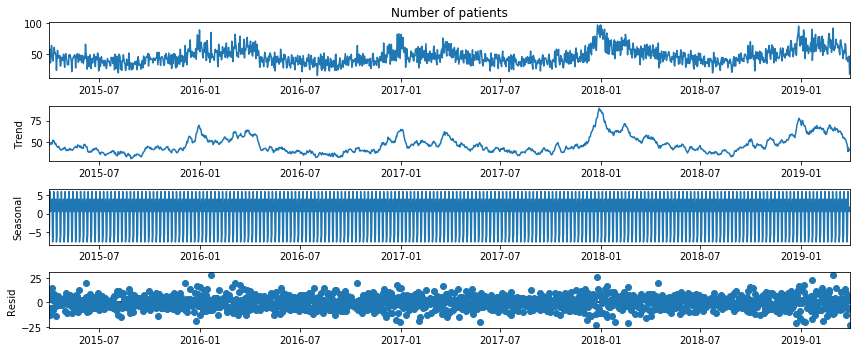

In [9]:
from pylab import rcParams
rcParams['figure.figsize'] = 12,5

result_1.plot();

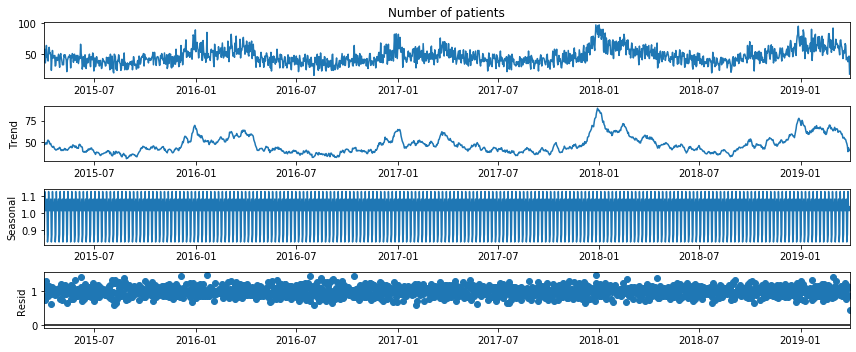

In [10]:
from pylab import rcParams
rcParams['figure.figsize'] = 12,5

result_2.plot();

# EWMA - Exponentially Weighted Moving Average

In [11]:
data['365-day-SMA'] = data['Number of patients'].rolling(window = 365).mean()

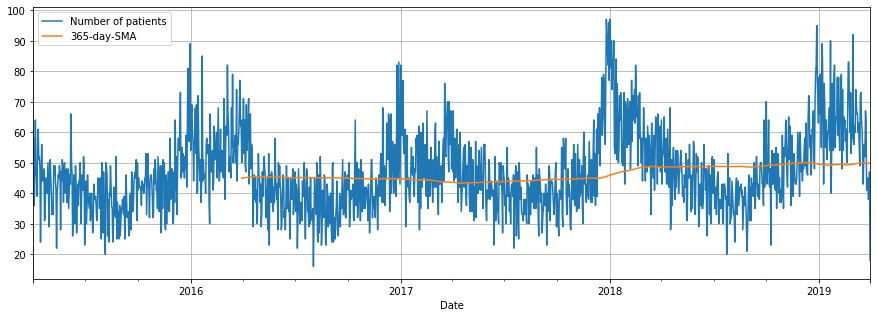

In [12]:
ax = data.plot(figsize = (15,5))
ax.yaxis.grid(True)
ax.xaxis.grid(True)

In [13]:
data['EWMA-30-Day'] = data['Number of patients'].ewm(span = 30).mean()
data['EWMA-365-Day'] = data['Number of patients'].ewm(span = 365).mean()

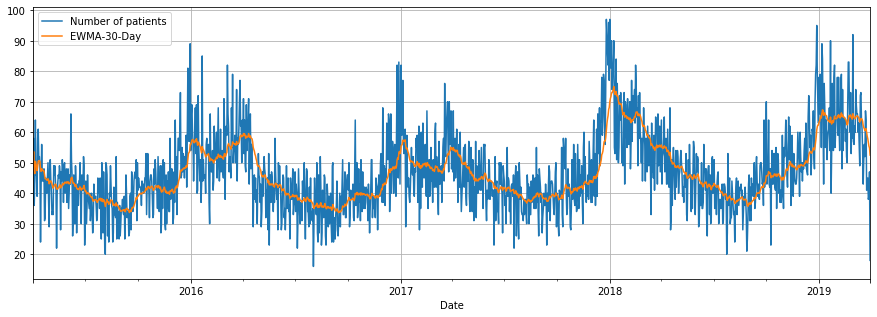

In [14]:
ax = data[['Number of patients', 'EWMA-30-Day']].plot(figsize = (15,5))
ax.yaxis.grid(True)
ax.xaxis.grid(True)

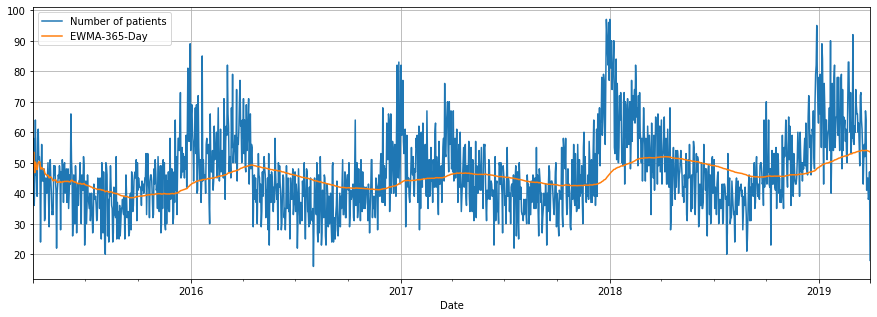

In [15]:
ax = data[['Number of patients', 'EWMA-365-Day']].plot(figsize = (15,5))
ax.yaxis.grid(True)
ax.xaxis.grid(True)

# Holt-Winters Method

In [16]:
data = pd.read_csv("TimeSeriesData.csv", index_col = 'Date')
data.dropna(inplace = True)
data.index = pd.to_datetime(data.index)
data.index.freq = 'D'

In [17]:
data.head()

,Number of patients
Date,
2015-04-01,49
2015-04-02,58
2015-04-03,36
2015-04-04,44
2015-04-05,64


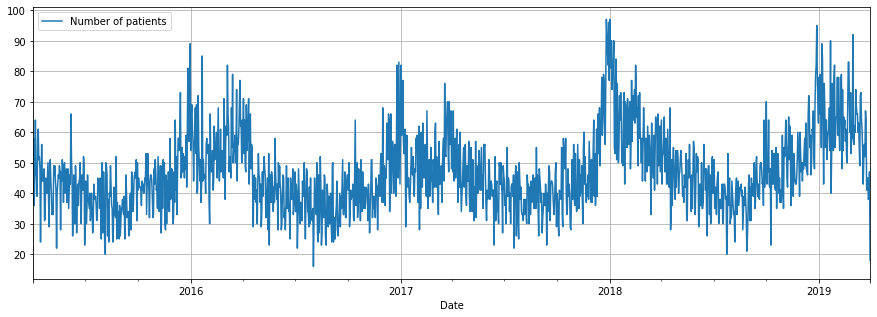

In [18]:
ax = data.plot(figsize = (15,5))
ax.yaxis.grid(True)
ax.xaxis.grid(True)

In [19]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [20]:
span = 365
alpha = 2/(span+1)

In [21]:
data['EWMA-365-Day'] = data['Number of patients'].ewm(alpha = alpha, adjust = False).mean()

In [22]:
model = SimpleExpSmoothing(data['Number of patients'])

In [23]:
fitted_model = model.fit(smoothing_level = alpha, optimized = False)

In [24]:
data['SES-365-Day'] = fitted_model.fittedvalues.shift(-1)

In [25]:
data.head()

,Number of patients,EWMA-365-Day,SES-365-Day
Date,,,
2015-04-01,49,49.000000,49.000000
2015-04-02,58,49.049180,49.049180
2015-04-03,36,48.977873,48.977873
2015-04-04,44,48.950672,48.950672
2015-04-05,64,49.032909,49.032909


In [26]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [27]:
data['DES_add_365_Day'] = ExponentialSmoothing(data['Number of patients'], trend = 'add').fit().fittedvalues.shift(-1)

In [28]:
data['DES_mul_365_Day'] = ExponentialSmoothing(data['Number of patients'], trend = 'mul').fit().fittedvalues.shift(-1)

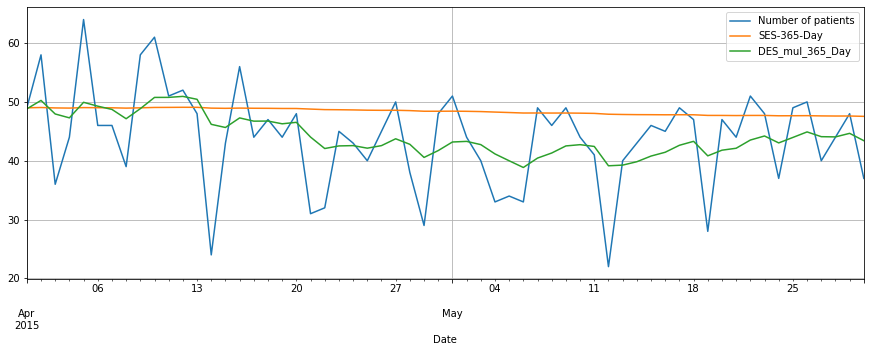

In [29]:
ax = data[['Number of patients', 'SES-365-Day', 'DES_mul_365_Day']].iloc[:60].plot(figsize = (15,5))
ax.yaxis.grid(True)
ax.xaxis.grid(True)

In [30]:
data['TES_mul_365_day'] = ExponentialSmoothing(data['Number of patients'], trend = 'mul', seasonal = 'mul').fit().fittedvalues

In [31]:
data['TES_add_365_day'] = ExponentialSmoothing(data['Number of patients'], trend = 'add', seasonal = 'add').fit().fittedvalues

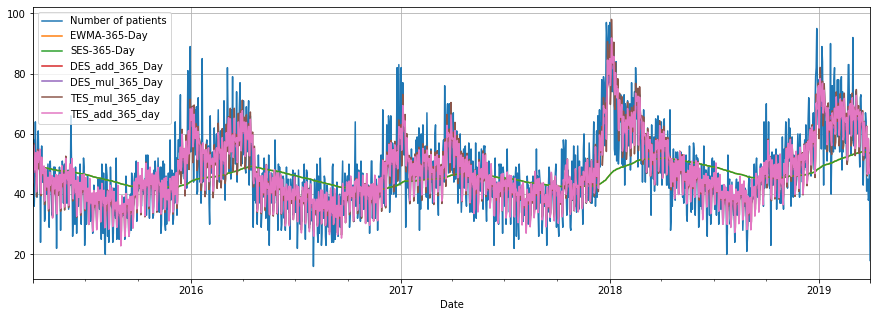

In [32]:
ax = data.plot(figsize = (15,5))
ax.yaxis.grid(True)
ax.xaxis.grid(True)

In [33]:
data.columns

Index(['Number of patients', 'EWMA-365-Day', 'SES-365-Day', 'DES_add_365_Day',
       'DES_mul_365_Day', 'TES_mul_365_day', 'TES_add_365_day'],
      dtype='object')

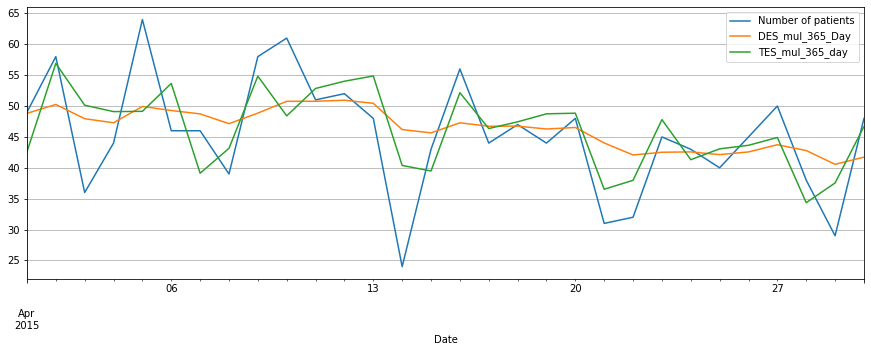

In [34]:
ax = data[['Number of patients', 'DES_mul_365_Day', 'TES_mul_365_day']].iloc[:30].plot(figsize = (15,5))
ax.yaxis.grid(True)
ax.xaxis.grid(True)

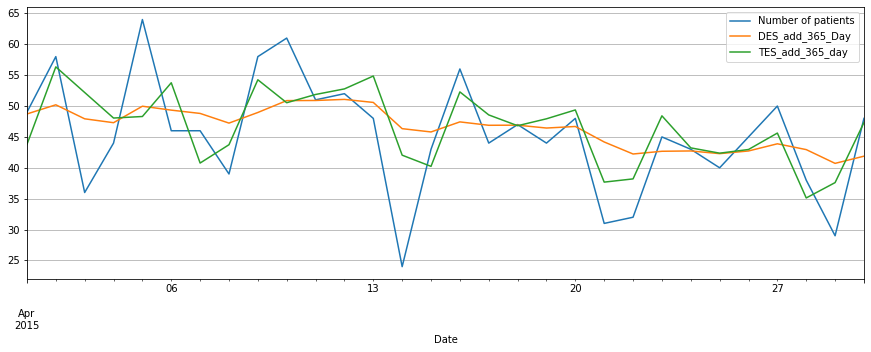

In [35]:
ax = data[['Number of patients', 'DES_add_365_Day', 'TES_add_365_day']].iloc[:30].plot(figsize = (15,5))
ax.yaxis.grid(True)
ax.xaxis.grid(True)

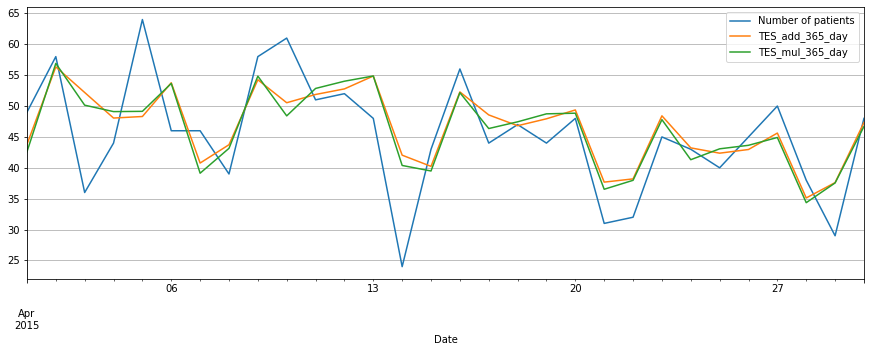

In [36]:
ax = data[['Number of patients', 'TES_add_365_day', 'TES_mul_365_day']].iloc[:30].plot(figsize = (15,5))
ax.yaxis.grid(True)
ax.xaxis.grid(True)

# Simple Forecasting (Multiplicative Model)

In [37]:
data = pd.read_csv("TimeSeriesData.csv", index_col = 'Date')
data.dropna(inplace = True)
data.index = pd.to_datetime(data.index)
data.index.freq = 'D'

In [38]:
data.head()

,Number of patients
Date,
2015-04-01,49
2015-04-02,58
2015-04-03,36
2015-04-04,44
2015-04-05,64


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1461 entries, 2015-04-01 to 2019-03-31
Freq: D
Data columns (total 1 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Number of patients  1461 non-null   int64
dtypes: int64(1)
memory usage: 22.8 KB


In [40]:
# From above a multiplicative TES trend looks good to use as it takes in to account variety
# 75% Train = 1461 Days * 0.75 = [:1095]
# 25% Test = 1461 Days * 0.25 = [1095:]

# i.e. we have test data to forecast on 1461 - 1095 = 366 days
# So we should only forecast as much as 366 days

In [41]:
train_data = data.iloc[:1094]
test_data = data.iloc[1094:]

In [42]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [43]:
fitted_model = ExponentialSmoothing(train_data['Number of patients'], 
                                   trend = 'mul',
                                   seasonal = 'mul',
                                   seasonal_periods = 365).fit()

In [44]:
test_predictions = fitted_model.forecast(367)

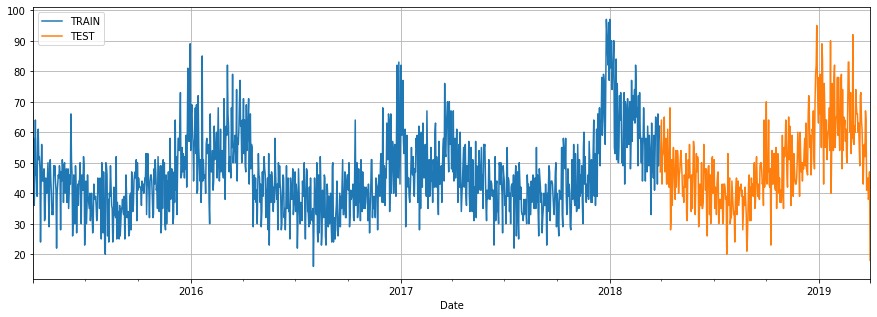

In [45]:
ax = train_data['Number of patients'].plot(legend = True, label = 'TRAIN', figsize = (15,5))
test_data['Number of patients'].plot(legend = True, label = 'TEST')
ax.yaxis.grid(True)
ax.xaxis.grid(True)

In [46]:
test_predictions

2018-03-30    59.961527
2018-03-31    58.629994
2018-04-01    61.651861
2018-04-02    59.791331
2018-04-03    58.391142
                ...    
2019-03-27    55.128950
2019-03-28    47.910862
2019-03-29    50.379391
2019-03-30    46.773375
2019-03-31    45.734704
Freq: D, Length: 367, dtype: float64

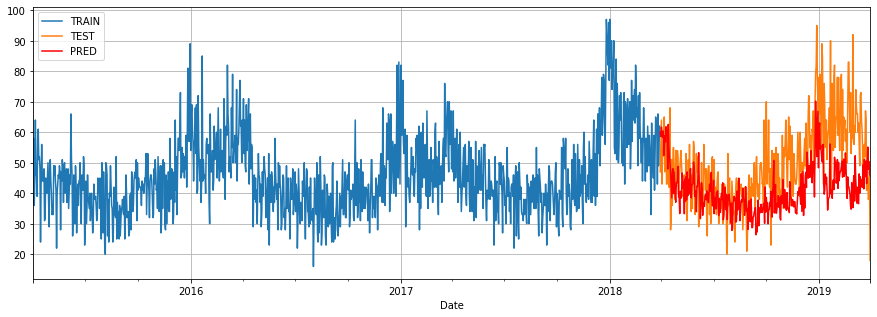

In [47]:
ax = train_data['Number of patients'].plot(legend = True, label = 'TRAIN', figsize = (15,5))
test_data['Number of patients'].plot(legend = True, label = 'TEST')
test_predictions.plot(legend = True, label = 'PRED', ls='-',c='r')
ax.yaxis.grid(True)
ax.xaxis.grid(True)

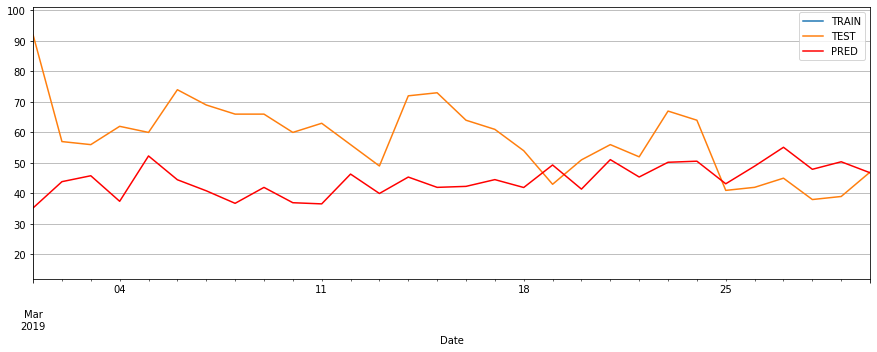

In [48]:
ax = train_data['Number of patients'].plot(legend = True, label = 'TRAIN', figsize = (15,5))
test_data['Number of patients'].plot(legend = True, label = 'TEST')
test_predictions.plot(legend = True, label = 'PRED', xlim = ['2019-03-01', '2019-03-30'], ls='-',c='r')
ax.yaxis.grid(True)
ax.xaxis.grid(True)

In [49]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [50]:
test_data.describe()

,Number of patients
count,367.000000
mean,49.722071
std,13.352273
min,18.000000
25%,41.000000
50%,48.000000
75%,57.000000
max,95.000000


In [51]:
mean_absolute_error(test_data,test_predictions)

11.699048179925333

In [52]:
np.sqrt(mean_squared_error(test_data,test_predictions))

14.93482271266676

In [53]:
final_model = ExponentialSmoothing(data['Number of patients'], trend = 'mul',
                                  seasonal = 'mul',
                                  seasonal_periods = 365).fit()

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


In [54]:
forecast_predictions = final_model.forecast(367)

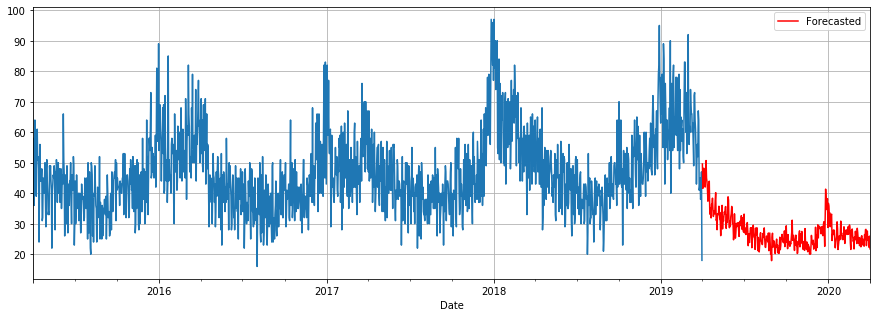

In [55]:
ax = data['Number of patients'].plot(figsize = (15,5))
forecast_predictions.plot(legend = True, label = 'Forecasted', ls='-',c='r')
ax.yaxis.grid(True)
ax.xaxis.grid(True)

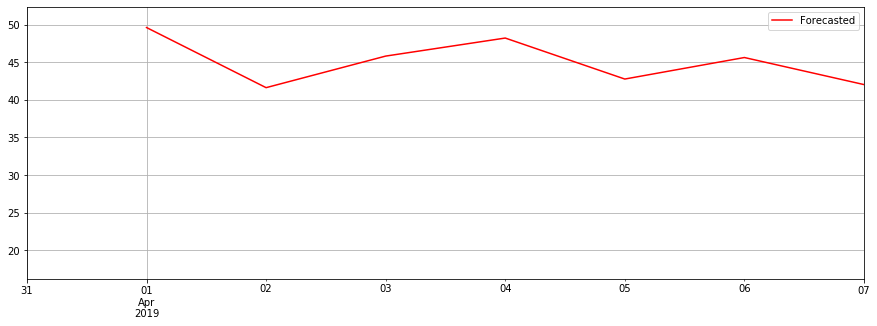

In [56]:
ax = forecast_predictions.plot(legend = True, label = 'Forecasted', xlim = ['2019-03-31', '2019-04-07'], ls='-',c='r',
                              figsize = (15,5))
ax.yaxis.grid(True)
ax.xaxis.grid(True)

# Simple Forecasting (Additive Model)

In [57]:
data = pd.read_csv("TimeSeriesData.csv", index_col = 'Date')
data.dropna(inplace = True)
data.index = pd.to_datetime(data.index)
data.index.freq = 'D'

In [58]:
data.head()

,Number of patients
Date,
2015-04-01,49
2015-04-02,58
2015-04-03,36
2015-04-04,44
2015-04-05,64


In [59]:
# From above a multiplicative TES trend looks good to use as it takes in to account variety
# 75% Train = 1461 Days * 0.75 = [:1095]
# 25% Test = 1461 Days * 0.25 = [1095:]

# i.e. we have test data to forecast on 1461 - 1095 = 366 days
# So we should only forecast as much as 366 days

In [60]:
train_data = data.iloc[:1094]
test_data = data.iloc[1094:]

In [61]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [62]:
fitted_model = ExponentialSmoothing(train_data['Number of patients'], 
                                   trend = 'add',
                                   seasonal = 'add',
                                   seasonal_periods = 365).fit()

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


In [63]:
test_predictions = fitted_model.forecast(367)

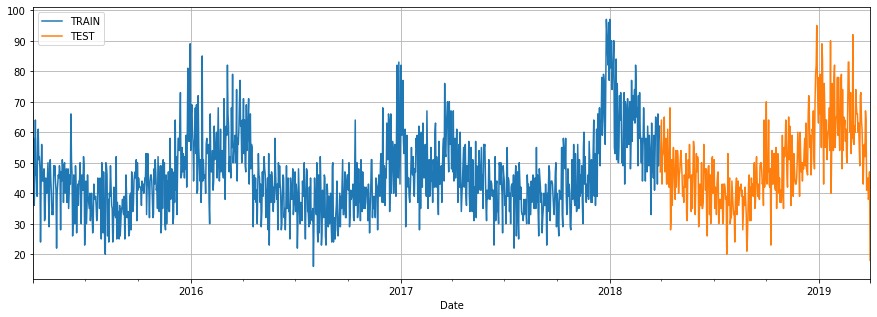

In [64]:
ax = train_data['Number of patients'].plot(legend = True, label = 'TRAIN', figsize = (15,5))
test_data['Number of patients'].plot(legend = True, label = 'TEST')
ax.yaxis.grid(True)
ax.xaxis.grid(True)

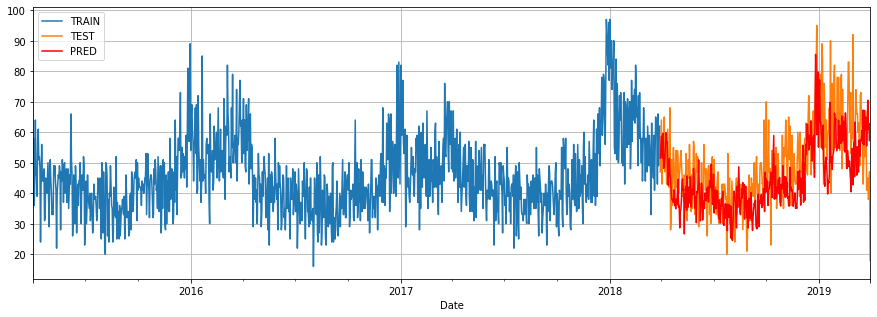

In [65]:
ax = train_data['Number of patients'].plot(legend = True, label = 'TRAIN', figsize = (15,5))
test_data['Number of patients'].plot(legend = True, label = 'TEST')
test_predictions.plot(legend = True, label = 'PRED', ls='-',c='r')
ax.yaxis.grid(True)
ax.xaxis.grid(True)

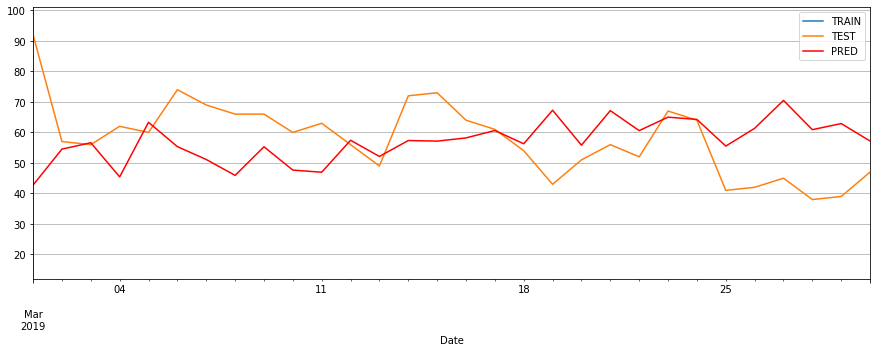

In [66]:
ax = train_data['Number of patients'].plot(legend = True, label = 'TRAIN', figsize = (15,5))
test_data['Number of patients'].plot(legend = True, label = 'TEST')
test_predictions.plot(legend = True, label = 'PRED', xlim = ['2019-03-01', '2019-03-30'], ls = '-', c = 'r')
ax.yaxis.grid(True)
ax.xaxis.grid(True)

In [67]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [68]:
test_data.describe()

,Number of patients
count,367.000000
mean,49.722071
std,13.352273
min,18.000000
25%,41.000000
50%,48.000000
75%,57.000000
max,95.000000


In [69]:
mean_absolute_error(test_data,test_predictions)

9.840770078050678

In [70]:
np.sqrt(mean_squared_error(test_data,test_predictions))

12.527792053706005

In [71]:
# Performance better with Additive model as RMSE < std, but better performance than multiplicative 

In [72]:
final_model = ExponentialSmoothing(data['Number of patients'], trend = 'add',
                                  seasonal = 'add',
                                  seasonal_periods = 365).fit()

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


In [73]:
forecast_predictions = final_model.forecast(367)

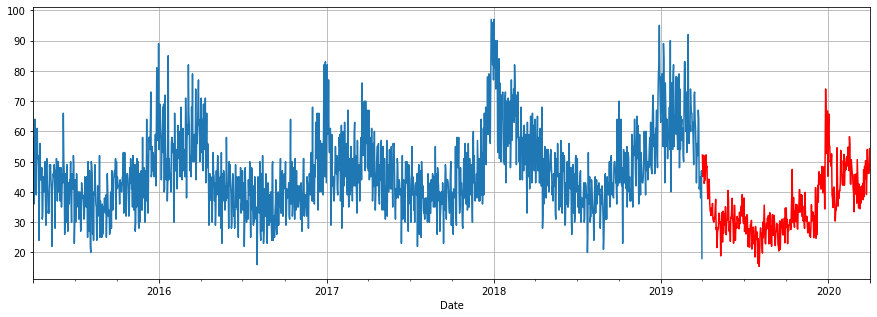

In [74]:
ax = data['Number of patients'].plot(figsize = (15,5))
forecast_predictions.plot(ls = '-', c = 'r')
ax.yaxis.grid(True)
ax.xaxis.grid(True)

In [75]:
data.tail()

,Number of patients
Date,
2019-03-27,45
2019-03-28,38
2019-03-29,39
2019-03-30,47
2019-03-31,18


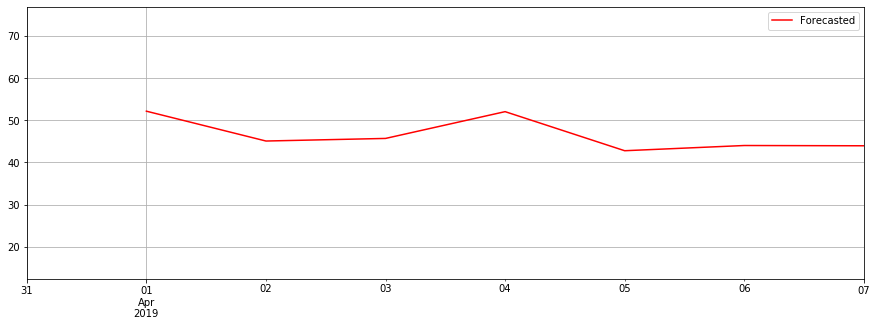

In [76]:
ax = forecast_predictions.plot(legend = True, label = 'Forecasted', xlim = ['2019-03-31', '2019-04-07'], ls = '-', c = 'r',
                         figsize = (15,5))
ax.yaxis.grid(True)
ax.xaxis.grid(True)

# ACF and PACF

In [77]:
data = pd.read_csv("TimeSeriesData.csv", index_col = 'Date')
data.dropna(inplace = True)
data.index = pd.to_datetime(data.index)
data.index.freq = 'D'

In [78]:
import statsmodels.api as sm

In [79]:
from statsmodels.tsa.stattools import acovf, acf, pacf, pacf_yw, pacf_ols

In [80]:
from pandas.plotting import lag_plot

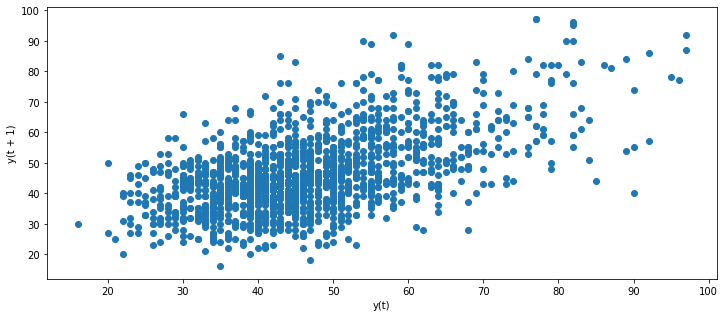

In [81]:
lag_plot(data['Number of patients'])

In [82]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

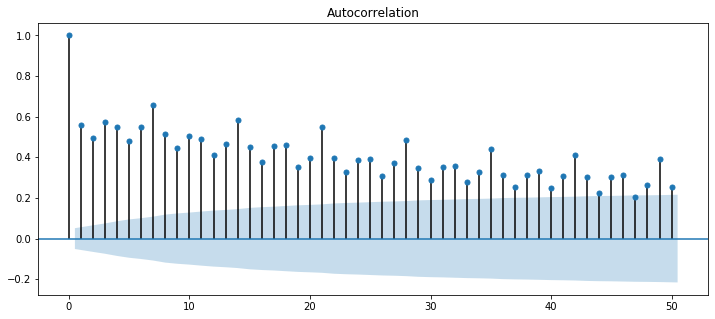

In [83]:
plot_acf(data, lags = 50);

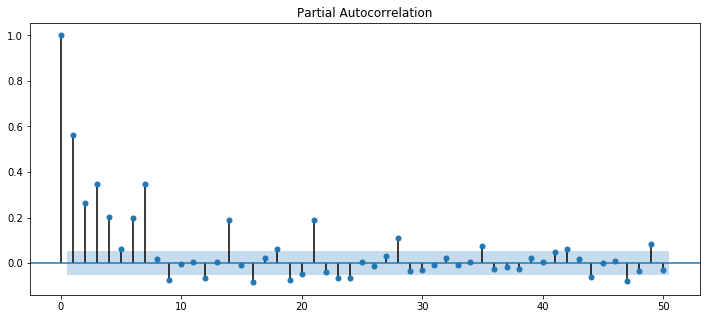

In [84]:
plot_pacf(data, lags = 50);

# Statistical Tests

In [85]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [86]:
adf_test(data['Number of patients'])

Augmented Dickey-Fuller Test: 
ADF test statistic        -3.570622
p-value                    0.006348
# lags used               23.000000
# observations          1437.000000
critical value (1%)       -3.434909
critical value (5%)       -2.863553
critical value (10%)      -2.567842
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [87]:
data = pd.read_csv("TimeSeriesData.csv", index_col = 'Date')
data.dropna(inplace = True)
data.index = pd.to_datetime(data.index)
data_1 = data.resample('MS').mean()
data_1.index.freq = 'MS'

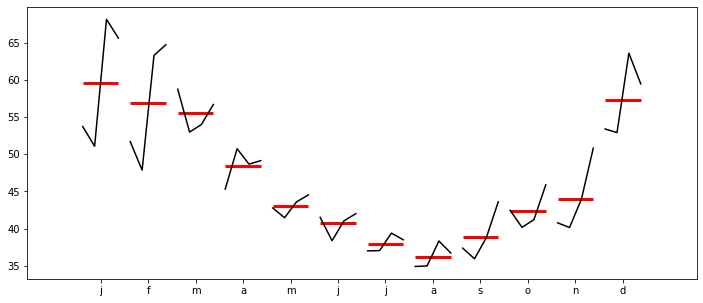

In [88]:
from statsmodels.graphics.tsaplots import month_plot,quarter_plot

month_plot(data_1['Number of patients']);

In [89]:
data_2 = data_1['Number of patients'].resample(rule = 'Q').mean()

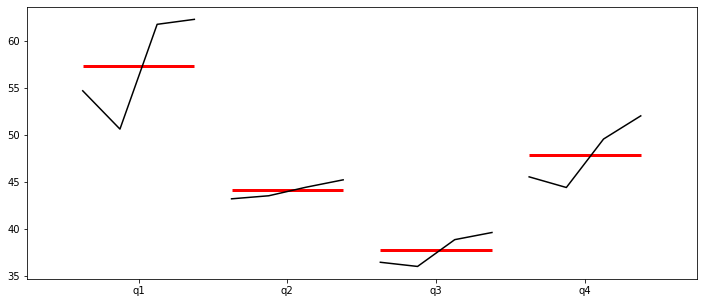

In [90]:
quarter_plot(data_2);

# SARIMA (Weekly Resample)

In [91]:
data = pd.read_csv("TimeSeriesData.csv", index_col = 'Date')
data.dropna(inplace = True)
data.index = pd.to_datetime(data.index)
data_2 = data.resample('W').mean()
data_2.index.freq = 'W'

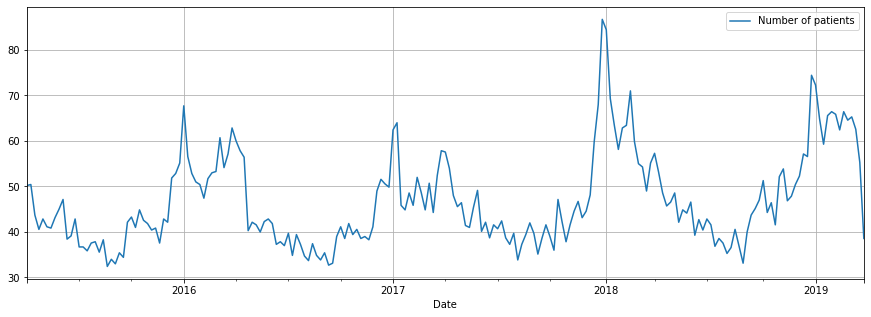

In [92]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

ax = data_2.plot(figsize = (15,5))
ax.yaxis.grid(True)
ax.xaxis.grid(True)

In [93]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 209 entries, 2015-04-05 to 2019-03-31
Freq: W-SUN
Data columns (total 1 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Number of patients  209 non-null    float64
dtypes: float64(1)
memory usage: 3.3 KB


In [94]:
data_2.tail()

,Number of patients
Date,
2019-03-03,64.571429
2019-03-10,65.285714
2019-03-17,62.571429
2019-03-24,55.285714
2019-03-31,38.571429


In [95]:
adf_test(data_2['Number of patients'])

Augmented Dickey-Fuller Test: 
ADF test statistic       -3.718106
p-value                   0.003866
# lags used               0.000000
# observations          208.000000
critical value (1%)      -3.462186
critical value (5%)      -2.875538
critical value (10%)     -2.574231
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [96]:
# From above a multiplicative TES trend looks good to use as it takes in to account variety
# 75% Train = 209 Weeks * 0.75 = [:156]
# 25% Test = 209 Days * 0.25 = [156:]

# i.e. we have test data to forecast on 209 - 156 = 53 weeks
# So we should only forecast as much as 53 weeks

In [97]:
from pmdarima import auto_arima

In [98]:
stepwise_fit = auto_arima(data_2['Number of patients'], seasonal = True, trace=True, 
                          error_action='ignore', suppress_warnings=True, m = 52)

Performing stepwise search to minimize aic
Fit ARIMA: (2, 1, 2)x(1, 0, 1, 52) (constant=True); AIC=1239.427, BIC=1266.127, Time=9.849 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 52) (constant=True); AIC=1273.152, BIC=1279.827, Time=0.038 seconds
Fit ARIMA: (1, 1, 0)x(1, 0, 0, 52) (constant=True); AIC=1251.673, BIC=1265.023, Time=2.021 seconds
Fit ARIMA: (0, 1, 1)x(0, 0, 1, 52) (constant=True); AIC=1257.346, BIC=1270.696, Time=2.412 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 52) (constant=False); AIC=1271.177, BIC=1274.514, Time=0.014 seconds
Fit ARIMA: (2, 1, 2)x(0, 0, 1, 52) (constant=True); AIC=1251.394, BIC=1274.757, Time=9.099 seconds
Near non-invertible roots for order (2, 1, 2)(0, 0, 1, 52); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.996)
Fit ARIMA: (2, 1, 2)x(1, 0, 0, 52) (constant=True); AIC=1244.078, BIC=1267.441, Time=12.265 seconds
Near non-invertible roots for order (2, 1, 2)(1, 0, 0, 52); setting score to inf (at least one inverse 

In [99]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  209
Model:             SARIMAX(1, 1, 1)x(1, 0, 1, 52)   Log Likelihood                -612.805
Date:                            Wed, 25 Mar 2020   AIC                           1237.609
Time:                                    16:25:18   BIC                           1257.634
Sample:                                         0   HQIC                          1245.706
                                            - 209                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0007      0.002      0.441      0.659      -0.002       0.004
ar.L1          0.8252      0.048     17.281      0.000       0.732       0.919
ma.L1         -0.9901      0.034    -29.371      0.000      -1.056      -0.924
ar.S.L52       0.8784      0.200      4.399      0.000       0.487       1.270
ma.S.L52      -0.6282      0.348     -1.806      0.071      -1.310       0.053
sigma2        19.2388      2.470      7.789      0.000      14.398      24.080
===================================================================================
Ljung-Box (Q):                       38.30   Jarque-Bera (JB):                26.41
Prob(Q):                              0.55   Prob(JB):                         0.00
Heteroskedasticity (H):               2.03   Skew:                             0.01
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [100]:
train = data_2.iloc[:156]
test = data_2.iloc[156:]

In [101]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(train['Number of patients'],order=(1,1,1),seasonal_order=(1,0,1,52))
results = model.fit()

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [102]:
# Obtain predicted values
start=len(train)
end=len(train)+len(test)-1
predictions = results.predict(start=start, end=end, dynamic=False, typ='levels').rename('SARIMA(1,1,1)(1,0,1,52) Predictions')

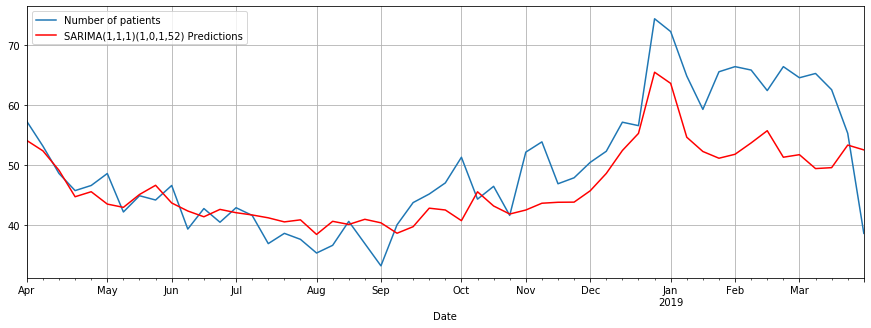

In [103]:
ax = test['Number of patients'].plot(legend=True,figsize=(15,5))
predictions.plot(legend=True, ls='-',c='r')
ax.yaxis.grid(True)
ax.xaxis.grid(True)

In [104]:
from statsmodels.tools.eval_measures import rmse

error = rmse(test['Number of patients'], predictions)

In [105]:
error

6.992832072147834

In [106]:
mean_absolute_error(test['Number of patients'], predictions)

5.259127234008797

In [107]:
test.describe()

,Number of patients
count,53.000000
mean,49.816712
std,10.548884
min,33.142857
25%,41.571429
50%,46.857143
75%,57.142857
max,74.428571


In [108]:
# SARIMA fits well as RMSE error < std dev of test data

In [109]:
model = SARIMAX(data_2['Number of patients'],order=(1,1,1),seasonal_order=(1,0,1,52))
results = model.fit()
fcast = results.predict((len(data_2) - 1),len(data_2)+53,typ='linear').rename('SARIMA(1,1,1)(1,0,1,52) Forecast')

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:1006: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


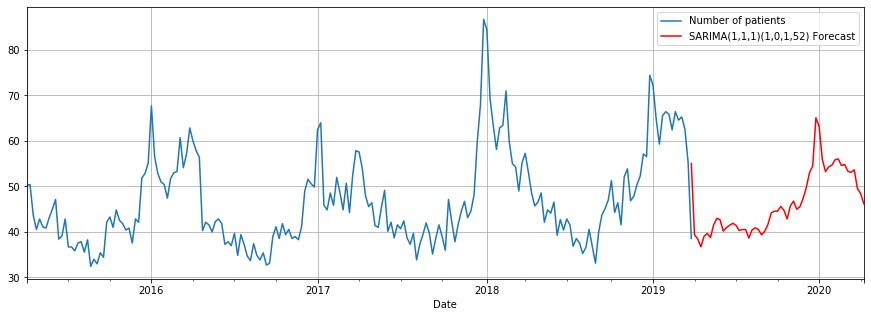

In [110]:
ax = data_2['Number of patients'].plot(legend=True,figsize=(15,5))
fcast.plot(legend=True, ls = '-', c = 'r')
ax.yaxis.grid(True)
ax.xaxis.grid(True)

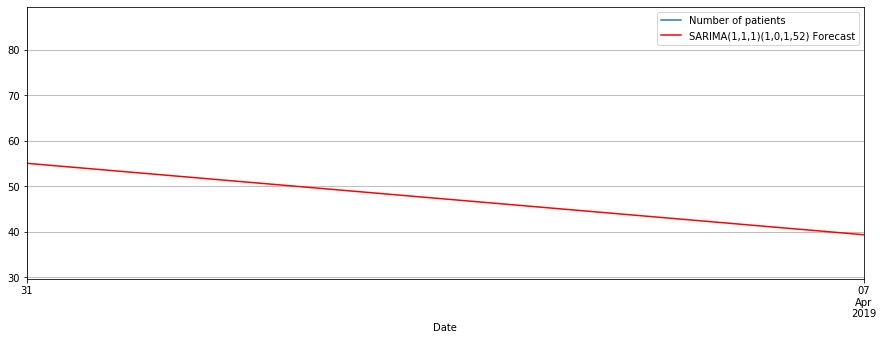

In [111]:
ax = data_2['Number of patients'].plot(legend=True,figsize=(15,5))
fcast.plot(legend=True, xlim = ['2019-03-31', '2019-04-07'], ls = '-', c = 'r')
ax.yaxis.grid(True)
ax.xaxis.grid(True)